# Expertiments with directed and undirected graphs

( This is done using my sage310 or kerasenv3.10.6 environment )

In [590]:
%matplotlib inline

import scipy
import scipy.io
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import time
#from sklearn.decomposition  import PCA
#from sklearn.svm import SVC
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn as sk
import random
import pprint
import numpy as np
import warnings
import re




import helper_common_files as HCF


rand_state = 42
np.random.seed(rand_state)


# change if k-corre is different in the dataset
# sure we can take this from the file..
# todo try to extract it from the file
kcorre_names = ( '1orbit-2-corre-dict', 
                '1orbit-3-corre-dict', 
                '1orbit-4-corre-dict', 
                '1orbit-5-corre-dict', 
                '1orbit-6-corre-dict',
                '1orbit-7-corre-dict')
                #'1orbit-8-corre-dict') 
max_k = HCF.find_maximum_number(kcorre_names)

debug_tree_creation_algorithms = False
pollute_dataset_with_non_isomorphic_graphs = False

# CANNOT, maybe we have to recompute the data structures 
#dataset_name = 'dataset-combinatorial-graphs/simple/graph6.g6-skew.pickle'
#dataset_name = 'dataset-combinatorial-graphs/simple/graph7.g6-skew.pickle'
#dataset_name = 'dataset-combinatorial-graphs/simple/graph9.g6-skew.pickle'


# dataset_name = 'dataset-combinatorial-graphs/chordal/chordal8.g6-so-rsksp.pickle'
# dataset_name = 'dataset-combinatorial-graphs/chordal/chordal9.g6-so-rsksp.pickle'
# dataset_name = 'dataset-combinatorial-graphs/chordal/chordal10.g6-so-rsksp.pickle'

#dataset_name = 'dataset-combinatorial-graphs/planar/planar_conn.6.g6-so-rsksp.pickle'

# dataset_name = 'dataset-combinatorial-graphs/highlyirregular/highlyirregular15.g6-so-rsksp.pickle'
# dataset_name = 'dataset-combinatorial-graphs/highlyirregular/highlyirregular14.g6-so-rsksp.pickle'

dataset_name = 'dataset-combinatorial-graphs/eulerian/eul10c.g6-so-rsksp.pickle'
# dataset_name = 'dataset-combinatorial-graphs/eulerian/eul9c.g6-so-rsksp.pickle'
# dataset_name = 'dataset-combinatorial-graphs/eulerian/eul8.g6-so-rsksp.pickle'


pattern = r'(?P<number>\d+)(?=[a-zA-Z]?\.g6)'


match = re.search(pattern, dataset_name)
if match:
    node_number = match.group('number')
    print(f"Matched number: {node_number}")
else:
    print("No match found.")



match = re.search(r'dataset-combinatorial-graphs/([^/]+)/', dataset_name)
if match:
    matched_string = match.group(1).capitalize()
    #print(matched_string)
else:
    print("No match found")


# Create the plot title
plot_title = f"{matched_string} graphs with {node_number} nodes"


truncate_at = 4
print(plot_title)

Matched number: 10
Eulerian graphs with 10 nodes


In [591]:
with open(dataset_name, 'rb') as handle:
    raw_dataset = pickle.load(handle)

dataset = raw_dataset[1]
# print(dataset.keys())

Pollute with non-isomorphic graphs the dataset and check for the pollution.

In [592]:
number_non_isomorphic_graphs = len(raw_dataset[0])

if pollute_dataset_with_non_isomorphic_graphs == True:
    raw_dataset = HCF.pollute_with_isomorphic_graphs(raw_dataset, 40, kcorre_names)


#isomorphic_graphs = HCF.find_isomorphic_graphs(raw_dataset[0])




print("Number of non-isomorphic graphs: ", number_non_isomorphic_graphs)
print("Number of isomorphic grpahs", len(isomorphic_graphs))
print("They are:")
try:
    pprint.pprint(isomorphic_graphs)
except Exception as e:
    print("Error: ", e)

Number of non-isomorphic graphs:  31026
Number of isomorphic grpahs 0
They are:
[]


Let's create the table that is used to build the graph data structure

In [593]:
##### THIS IS THE FAST ALGORITHM 
##### TODO MAYBE WE SHOULD TRUNCATE INSIDE THIS FUNCTION
T, T_dictionary = HCF.create_T_table(dataset, kcorre_names, truncate_at=truncate_at)
G = HCF.build_networkx_graph(T, maxk=5)         # todo  test and try to set this to max_k ????


# Are you sure you want to run this? Very slow. 
if debug_tree_creation_algorithms == True:
    T_test = HCF.create_T_table_2(dataset, kcorre_names)
    G_test = HCF.build_networkx_graph(T_test, maxk=5)     # todo  test and try to set this to max_k ????
    print(nx.is_isomorphic(G, G_test))

Debugging cells, comparing the two different algorithms for building a tree

In [594]:
# if debug_tree_creation_algorithms == True:
#     array1_ = np.array(T["1orbit-2-corre-dict"])
#     array2_ = np.array(T_test["1orbit-2-corre-dict"])


#     conflict1 = [x for x in array1_ if x not in array2_]    
#     conflict2 = [x for x in array2_ if x not in array1_]    

#     # print(T["1orbit-2-corre-dict"])
#     # print(array2_)  
#     print("len of conflit", len(conflict1), len(conflict2))
#     print(" ")
#     print(conflict1)
#     print(conflict2) 


#     #print(raw_dataset[0][conflict1[0].pop()].to_numpy_matrix()  ) 
#     print(np.allclose(dataset["1orbit-2-corre-dict"][253], dataset["1orbit-2-corre-dict"][266]))
#     print(np.linalg.norm(dataset["1orbit-2-corre-dict"][253] - dataset["1orbit-2-corre-dict"][266]))

#     print(T["1orbit-2-corre-dict"])

#     vector_tuple = tuple(np.round(dataset["1orbit-2-corre-dict"][253], decimals=6))
#     vector_tuple_ = tuple(np.round(dataset["1orbit-2-corre-dict"][266] , decimals=6))

#     if vector_tuple_ in T_dictionary["1orbit-2-corre-dict"]:
#         print("is present") 
#     if vector_tuple in T_dictionary["1orbit-2-corre-dict"]:
#         print("is present") 

#     # if vector_tuple in T["1orbit-2-corre-dict"]:
#     #     # If the vector representation exists in the dictionary, append the index
#     #     print("is present")
#     # else:
#     #     # Oth.. create a new entry with the index
#     #     print("is not present")

#     # if vector_tuple_ in T["1orbit-2-corre-dict"]:
#     #     # If the vector representation exists in the dictionary, append the index
#     #     print("is present")
#     # else:
#     #     # Oth.. create a new entry with the index
#     #     print("is not present")


#     T_tmp = {}
#     T_sets = {}

#     for kcorre_name in kcorre_names:

#         T_tmp[kcorre_name]={}

#         # Iterate through the skew_spectra and populate the dictionary
#         for index, vector in enumerate(dataset[kcorre_name]):
#             #print(index)
#             # Convert the vector to a tuple to use it as a dictionary key :) 
#             vector_tuple_tmp = tuple(np.round(vector, decimals=6))

#             if vector_tuple_tmp in T_tmp[kcorre_name]:
#                 # If the vector representation exists in the dictionary, append the index
#                 T_tmp[kcorre_name][vector_tuple_tmp].append(index)
#                 if index==253 or index==266:
#                     print(index, kcorre_name, "found it in if")
#             else:
#                 if index==253 or index==266:
#                     print(index, kcorre_name, "found it in else")
#                 # Oth.. create a new entry with the index
#                 T_tmp[kcorre_name][vector_tuple_tmp] = [index]

#             if vector_tuple_tmp in T_tmp[kcorre_name]:
#                 # If the vector representation exists in the dictionary, append the index
#                 if index==253 or index==266:
#                     print(index, kcorre_name, "(second round) found it in if")
#             else:
#                 if index==253 or index==266:
#                     print(index, kcorre_name, "(second round) found it in else")
#                 # Oth.. create a new entry with the index

#### Debug experiment 1
Let's find nodes or edges that are not linked to the main tree.

In [595]:
G_bfs = nx.bfs_tree(G, (0,0))
print("Number of NODES in original graph: {}, number of NODES in the BDF: {}".format(G.number_of_nodes(), G_bfs.number_of_nodes()))
print("Number of EDGES in original graph: {}, number of EDGES in the BDF: {}".format(G.number_of_edges(), G_bfs.number_of_edges()))


G_leftover_nodes = HCF.graph_subtraction_nodes(G, G_bfs)

print("What's left in the graph if we remove the BFS?")
print("Here is the list of nodes")
try:
    nodes = list(G_leftover_nodes.nodes)
    print(nodes)
except Exception as e:
    print(e)


G_leftover_edges = HCF.graph_subtraction_edges(G, G_bfs)

print("Here is the list of edges")
try:
    edges = list(G_leftover_edges.edges)
    pprint.pprint(edges)
except Exception as e:
    print(e)

Number of NODES in original graph: 57853, number of NODES in the BDF: 57853
Number of EDGES in original graph: 57853, number of EDGES in the BDF: 57852
What's left in the graph if we remove the BFS?
Here is the list of nodes
[]
Here is the list of edges
[((5, 4384, 833, 828, 854), (6, 352, 833, 4384, 854, 828))]


#### Debug experiment 2

In [596]:
print("Is G_bfs a DAG?: ", nx.is_directed_acyclic_graph(G_bfs))

print("Is G_bfs a Tree?: ", nx.is_tree(G_bfs))

print("Is G  a DAG?: ", nx.is_directed_acyclic_graph(G))

print("Is G  a Tree?: ", nx.is_tree(G))


Is G_bfs a DAG?:  True
Is G_bfs a Tree?:  True
Is G  a DAG?:  True
Is G  a Tree?:  False


#### Debug experiment 3
Let's print the tree :) 
You can play with different numbe of iterations and figsize

In [597]:
#pos = nx.spring_layout(G_bfs, iterations=50)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

In [598]:
#pos = nx.spring_layout(G_bfs, iterations=100)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

## Experiment 1: Finding lottery tickets.
#### A lottery ticket is a nodes with a split at depth k > 2

In [599]:
histogram, hits, lottery_tickets = HCF.count_bifurcations(G, kcorre_names)       

print("We have {} lottery tickets, i.e. nodes with a split at depth k>3 \n\n".format(len(lottery_tickets)))

pprint.pprint(histogram)

print("The number of nodes is ", G_bfs.number_of_nodes())
print("The number of graphs is ", len(raw_dataset[0]))

try:
    lottery_ticket = random.choice(lottery_tickets)
except Exception as e:
    pass

print("\n\nThe lottery tickets are:")
print(lottery_tickets)


We have 1195 lottery tickets, i.e. nodes with a split at depth k>3 


{'1orbit-0-corre-dict': 1054,
 '1orbit-2-corre-dict': 13000,
 '1orbit-3-corre-dict': 2468,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}
The number of nodes is  57853
The number of graphs is  31026


The lottery tickets are:
[(3, 234, 556, 934), (3, 966, 967, 551, 1004, 598, 246), (3, 1107, 263), (3, 704, 289), (3, 296, 696), (3, 401, 442), (3, 413, 527), (3, 416, 750), (3, 424, 454), (3, 508, 438), (3, 459, 999), (3, 464, 463), (3, 929, 478), (3, 778, 812, 785, 4371, 565), (3, 568, 937, 788, 976), (3, 594, 803, 573, 799), (3, 800, 577, 763, 804), (3, 821, 579, 764, 613), (3, 592, 801, 886), (3, 931, 599), (3, 608, 760, 757), (3, 633, 627), (3, 637, 1926), (3, 643, 669), (3, 745, 4349, 4350), (3, 806, 911), (3, 848, 851, 908), (3, 849, 909), (3, 4417, 4379, 4381, 855), (3, 4376, 890), (3, 1002, 963, 926), (3, 928, 965), (3, 1281, 2434, 1263, 2129, 1010, 12

In [600]:
try:
    print("Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation):", nx.is_isomorphic(raw_dataset[0][lottery_ticket[1]], raw_dataset[0][lottery_ticket[2]]))
    print("Are the 3-correlations the same?", np.allclose(raw_dataset[1]['1orbit-3-corre-dict'][lottery_ticket[1]], raw_dataset[1]['1orbit-3-corre-dict'][lottery_ticket[2]]))
    print("Are the 4-correlations the same?",  np.allclose(raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]], raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]]))
    print("Let's print the difference between the two 4 correlations")
    print(raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]]- raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]])
except Exception as e:
    print(e)
    pass

Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation): False
Are the 3-correlations the same? True
Are the 4-correlations the same? True
Let's print the difference between the two 4 correlations
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


Let's plot some of those lottery tickets

In [601]:
prevent_stopping_from_plotting_error = 2

if len(lottery_tickets) > 0:    
    fig, axs = plt.subplots(nrows=len(lottery_tickets), figsize=(7, 7*len(lottery_tickets)))
    for i, deadly_ticket in enumerate(lottery_tickets[:prevent_stopping_from_plotting_error]):
        newgraph = nx.union(raw_dataset[0][deadly_ticket[1]], raw_dataset[0][deadly_ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
        pos = nx.spring_layout(newgraph, iterations=20)
        #plt.figure(figsize=(7,7)) 
        #axs[i].imshow()
        try:
            nx.draw(newgraph, pos,  with_labels=True, font_size=8, ax=axs[i])
        except Exception as e:
            print(e)
            

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11313db40> (for post_execute):


ValueError: Image size of 700x836500 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 700x836500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 700x836500 with 1195 Axes>

## Experiment 2: Find graphs that we cannot distinguish at a certain level.

This is obviously interesting for level k> 2 (where our power comes from).

The non singleton nodes are: 
{0: [],
 1: [],
 2: [(2, 16, 3),
     (2, 17, 18, 4),
     (2, 33, 34, 35, 12, 22),
     (2, 352, 353, 19, 26, 27),
     (2, 32, 20, 31),
     (2, 354, 355, 21, 29, 30),
     (2, 24, 36),
     (2, 25, 351),
     (2, 106, 38),
     (2, 39, 40, 50, 51, 52, 58),
     (2, 41, 42, 59),
     (2, 44, 45, 55, 56, 57, 60),
     (2, 61, 46, 47),
     (2, 48, 49),
     (2, 53, 54),
     (2, 64, 65, 173, 174, 149),
     (2, 66, 164, 165, 166, 391, 73, 176, 177, 178, 179, 84, 369, 370, 155, 95),
     (2, 67, 68),
     (2, 69, 70),
     (2, 72, 71),
     (2, 74, 163),
     (2, 167, 168, 169, 75, 157),
     (2, 78, 79),
     (2, 385, 386, 387, 389, 107, 108, 365, 366, 82, 91, 93),
     (2, 97, 83, 110, 111),
     (2, 98, 85),
     (2, 100, 357, 358, 372, 373, 374, 87, 4341, 4342, 375),
     (2, 384, 388, 359, 104, 105, 360, 362, 88, 90, 381, 382, 383),
     (2, 102, 103, 361, 363, 4343, 4344, 89, 378, 379, 380),
     (2, 368, 92, 390, 367),
     (2, 109, 94),
     (2, 37

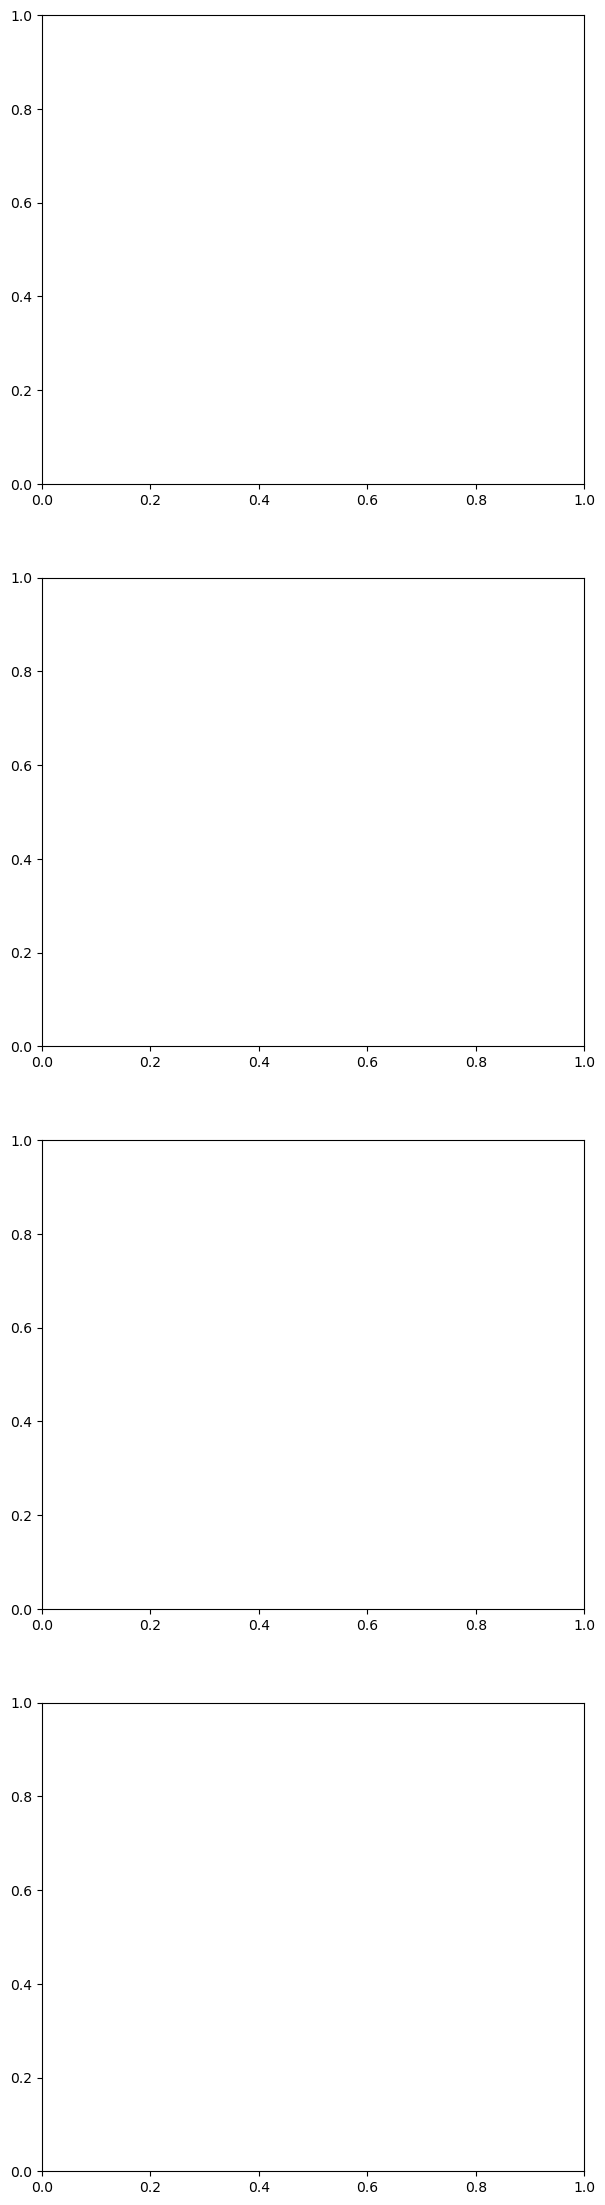

In [602]:
selected_k = 5
limit = 4     # hyperparameter to stop plotting after a certain limit o collisions

non_singleton_nodes = {i:[] for i in range(7)}

for node in G:
    if len(node) > 2:
        non_singleton_nodes[node[0]].append(node)

print("The non singleton nodes are: ")
pprint.pprint(non_singleton_nodes)





how_many_subplots = len(non_singleton_nodes[selected_k][:limit])

if how_many_subplots > 0:
    fig, axs = plt.subplots(nrows=how_many_subplots, figsize=(7, 7*how_many_subplots))

    for i, deadly_ticket in enumerate(non_singleton_nodes[selected_k][:limit]):
        print(deadly_ticket)
        #newgraph = nx.union(raw_dataset[0][ticket[1]], raw_dataset[0][ticket[2]], rename=("A-{}".format(i), "B-{}".format(i)))

        graphs = []
        for j, t in enumerate(deadly_ticket[1:]):
            g = nx.relabel_nodes(raw_dataset[0][t], lambda x: f"{chr(ord('A')+j)}-{x}")
            graphs.append(g)

        newgraph = nx.compose_all(graphs)

        try:
            pos = nx.spring_layout(newgraph, iterations=20)
            nx.draw(newgraph, pos, ax=axs,  with_labels=True, font_size=8)
        #nx.draw(newgraph, pos, ax=axs[i],  with_labels=True, font_size=8)
        # If there is more then one non_singleton_nodes[selected_k] we need to use axs[i] instead of axs

        except Exception as e:
            print(e)
        

## Experiment 3: Find graphs that we cannot distinguish at the end of the tree

Let's look at the leaves of the tree. There might be leaves with n at any layer (if we made error building the graph), and leaves at layer k=$maxk. Let's 

In [603]:
leaves = [x for x in G.nodes() if G.out_degree(x)==0]
print("Number of leaves", len(leaves))

non_separated_leaves = [x for x in G.nodes() if G.out_degree(x)==0 and len(x) > 2]  
print("Number of non separated leaves at any level: {}".format(len(non_separated_leaves)))
print(non_separated_leaves)

non_separated_leaves_lastk = [x for x in G.nodes() if G.out_degree(x)==0 and len(x) > 2 and x[0]==max_k] 
print("Number of non separated leaves at last layer 6: {}".format(len(non_separated_leaves_lastk)))
print(non_separated_leaves_lastk)

print('')


paths = nx.all_simple_paths(G, (0,0), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
paths = [path for path in paths]
print("The number of paths is: ", len(paths))
print("The paths are: ")
pprint.pprint(paths)

Number of leaves 14517
Number of non separated leaves at any level: 5762
[(6, 26, 19), (6, 100, 357), (6, 102, 103, 361, 4343, 378), (6, 107, 108), (6, 110, 111), (6, 112, 395, 125), (6, 122, 406), (6, 123, 140), (6, 124, 397), (6, 145, 126), (6, 402, 403, 134), (6, 144, 417, 434), (6, 171, 172), (6, 192, 206), (6, 236, 223), (6, 552, 230), (6, 234, 556), (6, 555, 235), (6, 249, 250, 237), (6, 238, 239), (6, 241, 591), (6, 242, 631), (6, 243, 252, 254, 251), (6, 244, 255), (6, 966, 967, 551, 598, 246), (6, 257, 639), (6, 638, 262), (6, 266, 683), (6, 280, 281), (6, 282, 283, 284), (6, 299, 292), (6, 315, 316), (6, 317, 318), (6, 352, 833, 4384, 854, 828), (6, 379, 363), (6, 4344, 380), (6, 449, 396), (6, 408, 429), (6, 432, 411), (6, 418, 435), (6, 461, 462), (6, 465, 466), (6, 467, 468), (6, 1001, 470), (6, 489, 491), (6, 721, 503), (6, 512, 716), (6, 746, 725, 519), (6, 520, 521, 723), (6, 524, 748, 726), (6, 528, 529), (6, 531, 532), (6, 533, 534), (6, 536, 535), (6, 537, 538), (6, 

### Finding collisions: nodes with indegree > 1

In [604]:
histogram, non_singleton_nodes = HCF.count_collisions(G, kcorre_names)      


print("Total indegree of collisions for each k")
pprint.pprint(histogram)
print("\n")
print("Recall the number of nodes with indegree bigger than 1 is: ", len(non_singleton_nodes))
print("\n")

try:
    hit = random.choice(hits)
    print("Random collision: {}".format(hit))
except Exception as e:
    print("Cannot find a collision:", e)


print("\nAll collisions:")
pprint.pprint(non_singleton_nodes)


Total indegree of collisions for each k
{'1orbit-0-corre-dict': 0,
 '1orbit-2-corre-dict': 0,
 '1orbit-3-corre-dict': 0,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 2,
 '1orbit-7-corre-dict': 0}


Recall the number of nodes with indegree bigger than 1 is:  1


Random collision: (3, 15780, 24646, 19912, 26926, 20025, 25115, 25054)

All collisions:
[(6, 352, 833, 4384, 854, 828)]


### Let's look at the edges that are in the graph but not in the tree.

Thus should return similar information to the cells above, i.e. edges that are creating collisions.

In [605]:
# Remove G_Bfs from G
G_leftover_edges = HCF.graph_subtraction_edges(G, G_bfs)

print("The nuber of edges that we removed is: {}.".format(len(G_leftover_edges.edges())))

for edge in G_leftover_edges.edges():
    print(edge)


The nuber of edges that we removed is: 1.
((5, 4384, 833, 828, 854), (6, 352, 833, 4384, 854, 828))


## Experiment 4: Plotting frequency historgram of collisions


Number of colloding kredskew:  [29972, 17781, 16508, 16508, 16509, 22847]


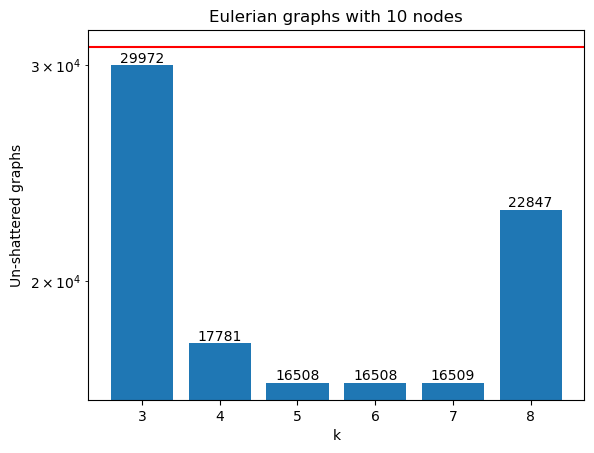

In [606]:
number_colliding_kredskew = []
for kcorre_name in kcorre_names:
    number_colliding_kredskew.append(number_non_isomorphic_graphs-len(set(tuple(np.round(row, decimals=truncate_at)) for row in dataset[kcorre_name])))



numeric_part = np.array([int(name.split('-')[1])+1 for name in kcorre_names])
#numeric_part = numeric_part+1

bars = plt.bar(numeric_part, number_colliding_kredskew)
print("Number of colloding kredskew: ", number_colliding_kredskew)

plt.axhline(y = number_non_isomorphic_graphs, color = 'r', linestyle = '-')     # non isomorphic graphs set at the beginning of the notebook

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        height,                              # Y-coordinate: top of the bar
        f'{height}',                         # Text to display
        ha='center',                         # Horizontal alignment
        va='bottom',                         # Vertical alignment
        fontsize=10,                         # Font size
        color='black'                        # Text color
    )


plt.xlabel('k')
plt.ylabel('Un-shattered graphs')
plt.yscale("log") 

plt.title(plot_title)

# output_file = re.sub(r'\.pickle$', f'_truncate_at-{truncate_at}.pdf', dataset_name)
filename = dataset_name.replace('.pickle', f'_truncate_at-{truncate_at}.pdf')
plt.savefig(filename)

plt.show()